In [193]:
# read in data

import glob
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

glued_data = pd.DataFrame()
for file_name in glob.glob('*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data,x],axis=0)
    
glued_data = glued_data.drop(['Unnamed: 0'], axis=1)
glued_data = glued_data.set_index('token_id')
glued_data["current_price"] = glued_data["current_price"].astype(float)/1000000000000000000

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [195]:
filtered_data = glued_data[glued_data["current_price"]>40]

In [196]:
filtered_data.head()

,Background,Fur,Clothes,Mouth,Eyes,collection_name,contract_address,current_price,expected_price,image_url,timestamp,Hat,Earring
token_id,,,,,,,,,,,,,
10,Aquamarine,Dmt,Navy Striped Tee,Bored,Eyepatch,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,189.000,218880000000000000000,https://lh3.googleusercontent.com/-2lJuLt70dQw...,2022-01-15 20:29:47.175623,Bayc Hat Red,NaN
1005,Aquamarine,Cream,NaN,Bored,X Eyes,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,139.000,218880000000000000000,https://lh3.googleusercontent.com/csLTGZqNSBlW...,2022-01-15 20:57:32.137505,NaN,NaN
1008,Yellow,Gray,Biker Vest,Grin Diamond Grill,Bored,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,95.010,218880000000000000000,https://lh3.googleusercontent.com/0EWiMS04N_Yz...,2022-01-15 20:57:36.996222,Army Hat,NaN
1012,Yellow,Pink,Lumberjack Shirt,Bored Unshaven Cigarette,Bloodshot,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,88.110,218880000000000000000,https://lh3.googleusercontent.com/vKmCfgKCUTzz...,2022-01-15 20:57:43.366334,Police Motorcycle Helmet,NaN
1017,Purple,Black,Bayc T Black,Bored Unshaven,Bored,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,79.000,218880000000000000000,https://lh3.googleusercontent.com/93RffHhRH5KR...,2022-01-15 20:57:51.333050,Seaman's Hat,NaN


In [197]:
# Prediction model
y = filtered_data["current_price"]

Mouth = pd.get_dummies(filtered_data.Mouth, prefix='Mouth')
Background = pd.get_dummies(filtered_data.Background, prefix='Background')
Fur = pd.get_dummies(filtered_data.Fur, prefix='Fur')
Clothes = pd.get_dummies(filtered_data.Clothes, prefix='Clothes')
Eyes = pd.get_dummies(filtered_data.Eyes, prefix='Eyes')
Hat = pd.get_dummies(filtered_data.Hat, prefix='Hat')
Earring = pd.get_dummies(filtered_data.Earring, prefix='Earring')

frames = [Mouth, Background, Fur, Clothes, Eyes, Hat, Earring, y]

filtered_data_x = pd.concat(frames, axis=1)

In [198]:
filtered_data_x

,Mouth_Bored,Mouth_Bored Bubblegum,Mouth_Bored Cigar,Mouth_Bored Cigarette,Mouth_Bored Dagger,Mouth_Bored Kazoo,Mouth_Bored Party Horn,Mouth_Bored Pipe,Mouth_Bored Pizza,Mouth_Bored Unshaven,...,Hat_Trippy Captain's Hat,Hat_Vietnam Era Helmet,Hat_Ww2 Pilot Helm,Earring_Cross,Earring_Diamond Stud,Earring_Gold Hoop,Earring_Gold Stud,Earring_Silver Hoop,Earring_Silver Stud,current_price
token_id,,,,,,,,,,,,,,,,,,,,,
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,189.000
1005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,139.000
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,95.010
1012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88.110
1017,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,79.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,207.960
9992,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125.010
9993,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000.000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bored'),
  Text(1, 0, 'Bored Unshaven'),
  Text(2, 0, 'Bored Cigarette'),
  Text(3, 0, 'Grin'),
  Text(4, 0, 'Grin Multicolored')])

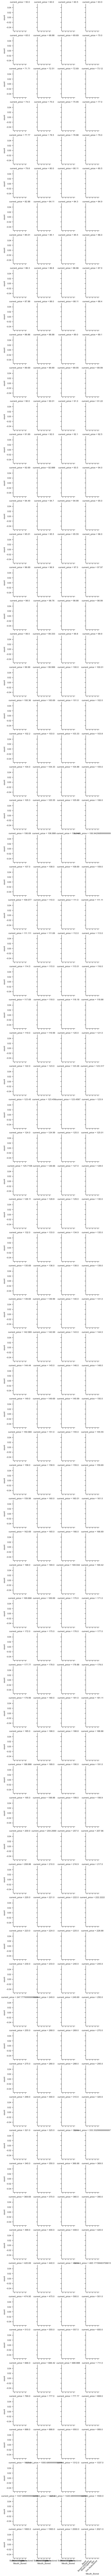

In [150]:
import seaborn as sns


g = sns.catplot(x='Mouth_Bored', col="current_price", col_wrap=4,
                data=filtered_data_x,
                kind="count", height=2.5, aspect=.8)
plt.xticks(rotation=45, ha='right')
#plt.ylim(10,400);


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
invalid value encountered in true_divide
`distplot` is a deprecated function and

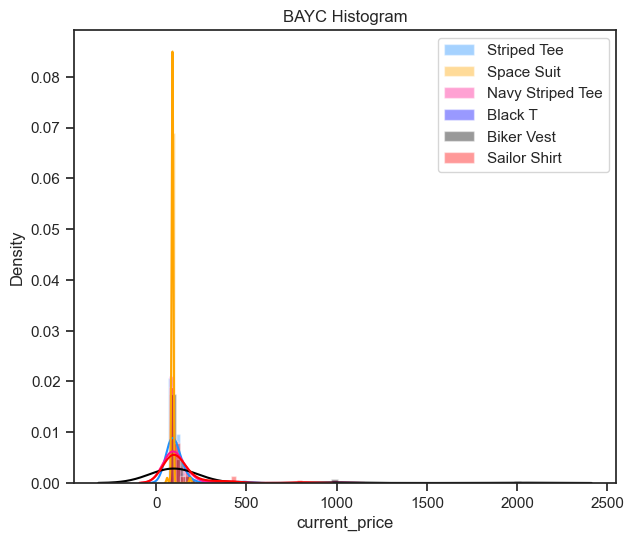

In [85]:
# Solution
import seaborn as sns
df = filtered_data

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.Clothes=='Striped Tee', "current_price"] , color="dodgerblue", label="Striped Tee")
sns.distplot( df.loc[df.Clothes=='Space Suit', "current_price"] , color="orange", label="Space Suit")
sns.distplot( df.loc[df.Clothes=='Navy Striped Tee', "current_price"] , color="deeppink", label="Navy Striped Tee")
sns.distplot( df.loc[df.Clothes=='Black T ', "current_price"] , color="blue", label="Black T")
sns.distplot( df.loc[df.Clothes=='Biker Vest', "current_price"] , color="black", label="Biker Vest")
sns.distplot( df.loc[df.Clothes=='Sailor Shirt', "current_price"] , color="red", label="Sailor Shirt")

plt.title('BAYC Histogram')
plt.legend();

In [86]:
#filtered_data.Clothes.unique()
filtered_data.Clothes.value_counts().head(10).index

Index(['Space Suit', 'Navy Striped Tee', 'Striped Tee', 'Black T',
       'Biker Vest', 'Hawaiian', 'Tanktop', 'Sailor Shirt', 'Tuxedo Tee',
       'Sleeveless T'],
      dtype='object')

<AxesSubplot:xlabel='Clothes', ylabel='current_price'>

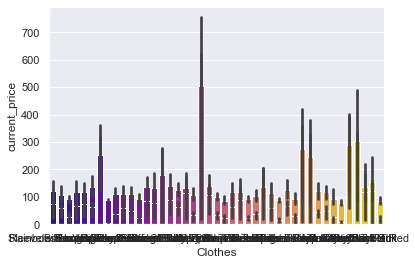

In [58]:
# set the background style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x =filtered_data.Clothes, y ='current_price', data = df, palette ='plasma')
 
# or
import numpy as np
 
# change the estimator from mean to standard deviation
sns.barplot(x =filtered_data.Clothes, y ='current_price', data = df,
            palette ='plasma', estimator = np.std)

Text(0.5, 0.98, 'Categorical Plotting')

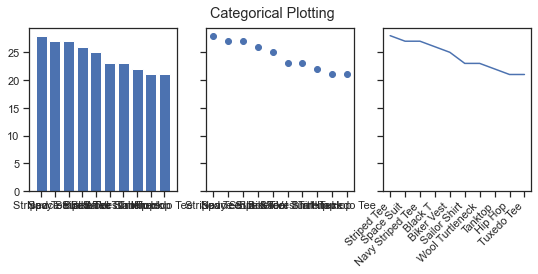

In [52]:
import matplotlib.pyplot as plt

#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(filtered_data.Clothes.value_counts().head(10).index)
values = list(filtered_data.Clothes.value_counts().head(10).values)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
plt.xticks(rotation=45, ha='right')
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)

fig.suptitle('Categorical Plotting')

In [45]:
names

[28, 27, 27, 26, 25, 23, 23, 22, 21, 21]

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


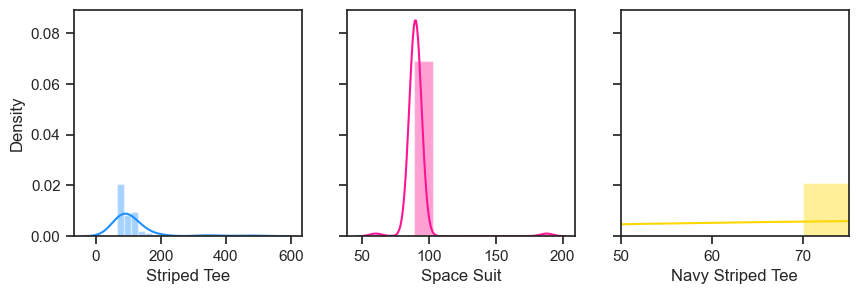

In [91]:
# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
x1 = df.loc[df.Clothes=='Striped Tee', "current_price"]
x2 = df.loc[df.Clothes=='Space Suit', "current_price"]
x3 = df.loc[df.Clothes=='Navy Striped Tee', "current_price"]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Striped Tee')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Space Suit')
sns.distplot(x3 , color="gold", ax=axes[2], axlabel='Navy Striped Tee')
plt.xlim(50,75);

In [63]:
#sns.jointplot(data=filtered_data, x="Clothes", y="current_price", hue="Clothes")
#sns.catplot(x="Clothes", y="current_price", hue="Clothes", kind="swarm", data=filtered_data)

In [64]:
#sns.catplot(x="Clothes", y="current_price", data=filtered_data)

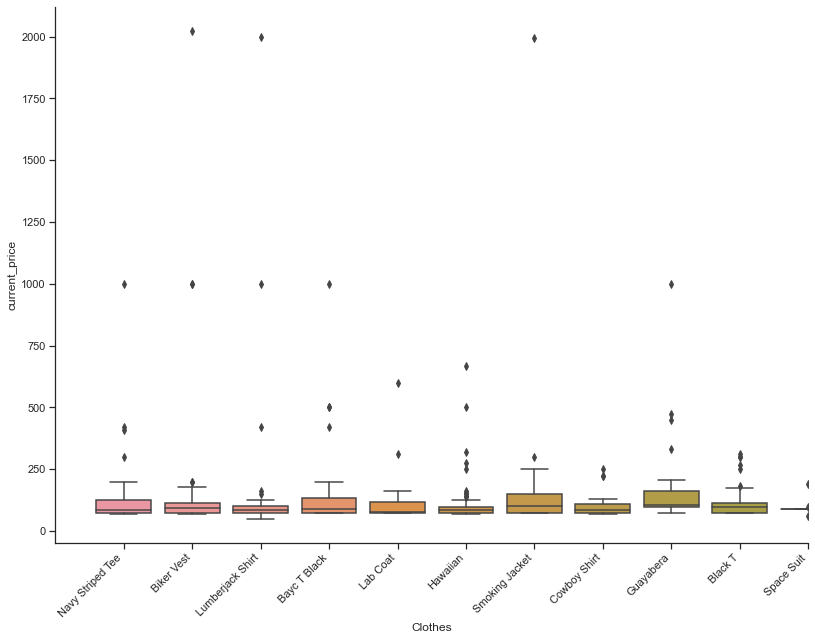

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
plot=sns.catplot(x="Clothes", y="current_price", kind="box", data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.xlim(-1,10);

In [69]:
#filtered_data.Clothes.unique()
selection = filtered_data.Clothes.value_counts().head(10).index


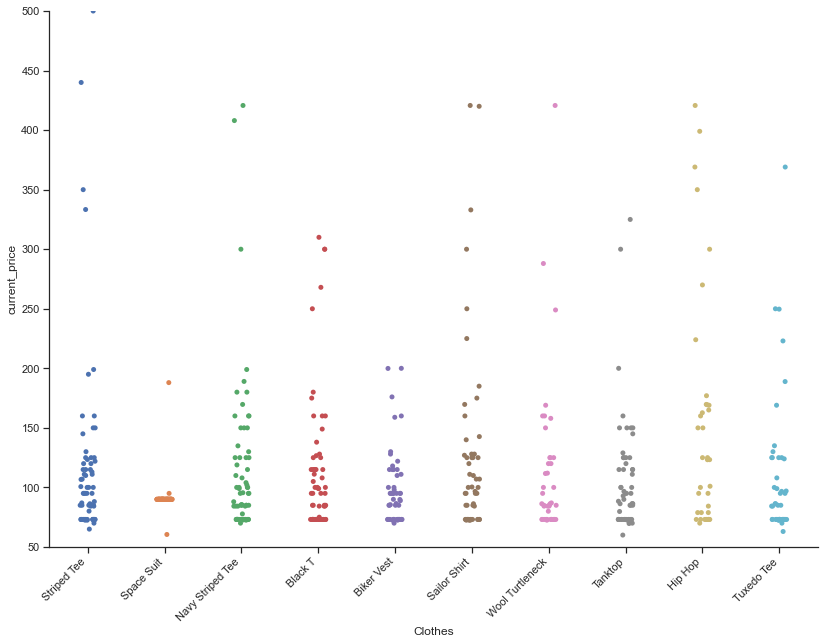

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
#plot=sns.catplot(x="Clothes", y="current_price", kind="box", data=filtered_data, height=8.27, aspect=11.7/8.27)
plot=sns.catplot(x="Clothes", y="current_price", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,500);

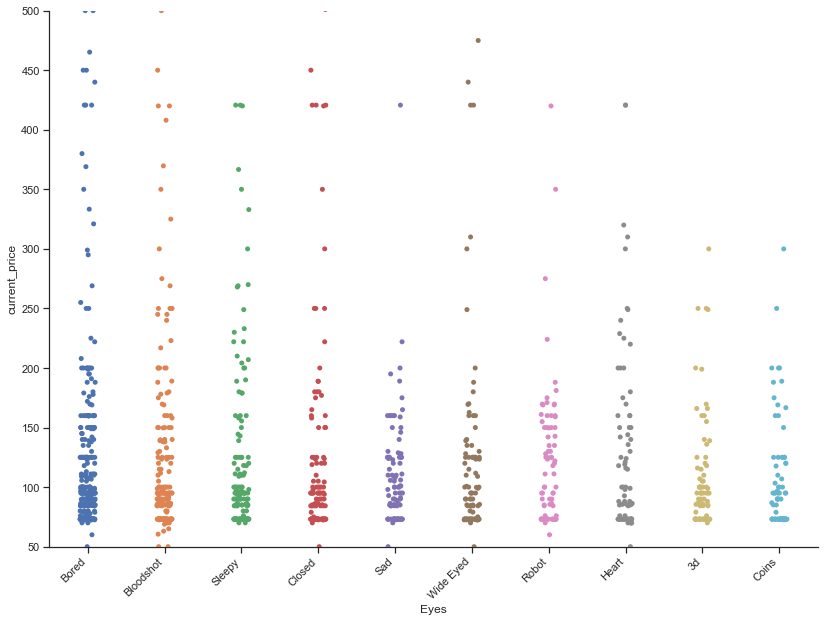

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#filtered_data.Clothes.unique()
selection = filtered_data.Eyes.value_counts().head(10).index

#plot=sns.catplot(x="Clothes", y="current_price", kind="box", data=filtered_data, height=8.27, aspect=11.7/8.27)
plot=sns.catplot(x="Eyes", y="current_price", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,500);

#Background	Fur	Clothes	Mouth	Eyes

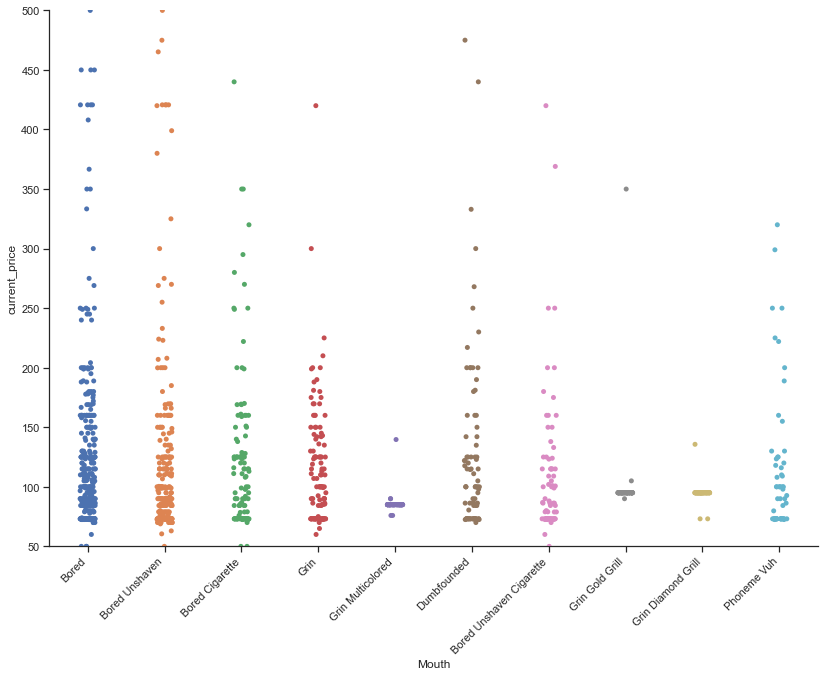

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#filtered_data.Clothes.unique()
selection = filtered_data.Mouth.value_counts().head(10).index

#plot=sns.catplot(x="Clothes", y="current_price", kind="box", data=filtered_data, height=8.27, aspect=11.7/8.27)
plot=sns.catplot(x="Mouth", y="current_price", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,500);

#Background	Fur	Clothes	Mouth	Eyes

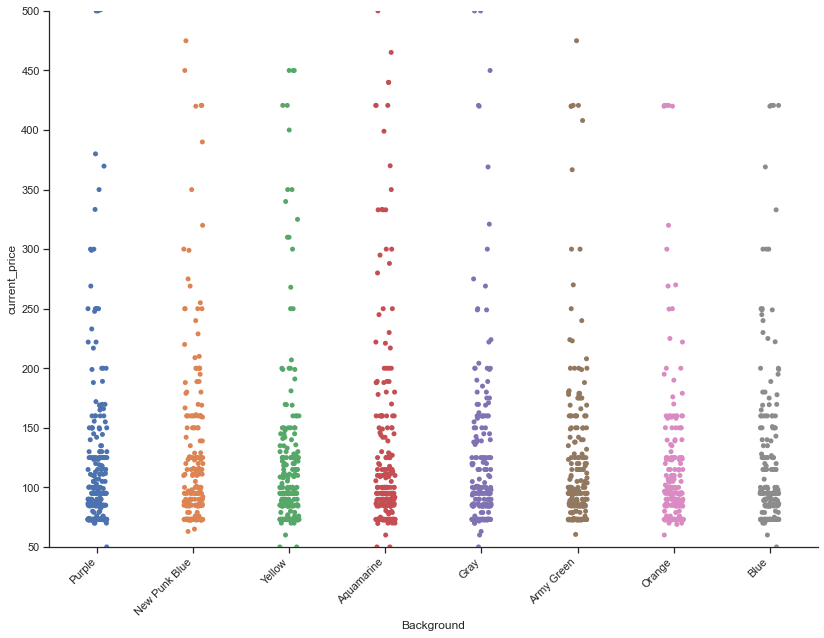

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#filtered_data.Clothes.unique()
selection = filtered_data.Background.value_counts().head(10).index

#plot=sns.catplot(x="Clothes", y="current_price", kind="box", data=filtered_data, height=8.27, aspect=11.7/8.27)
plot=sns.catplot(x="Background", y="current_price", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,500);

#Background	Fur	Clothes	Mouth	Eyes

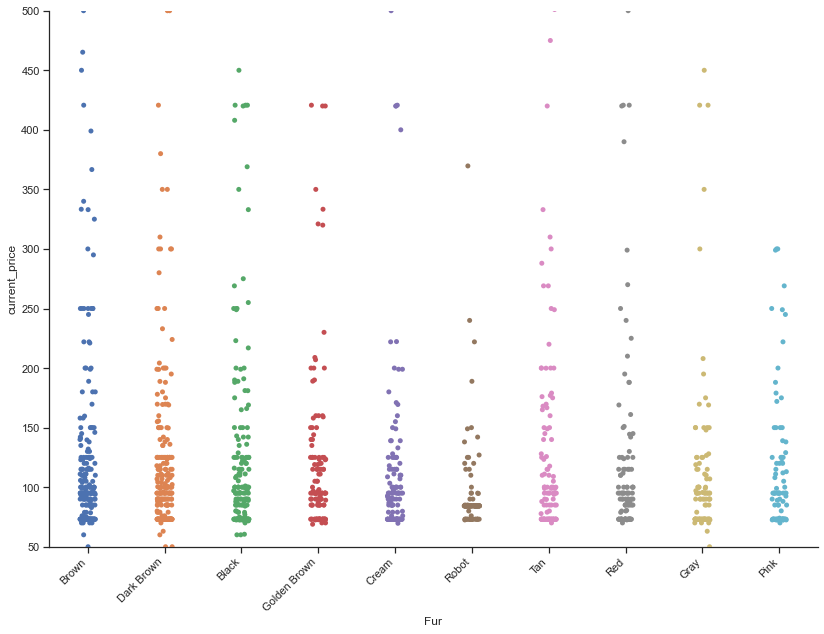

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#filtered_data.Clothes.unique()
selection = filtered_data.Fur.value_counts().head(10).index

#plot=sns.catplot(x="Clothes", y="current_price", kind="box", data=filtered_data, height=8.27, aspect=11.7/8.27)
plot=sns.catplot(x="Fur", y="current_price", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,500);

#Background	Fur	Clothes	Mouth	Eyes

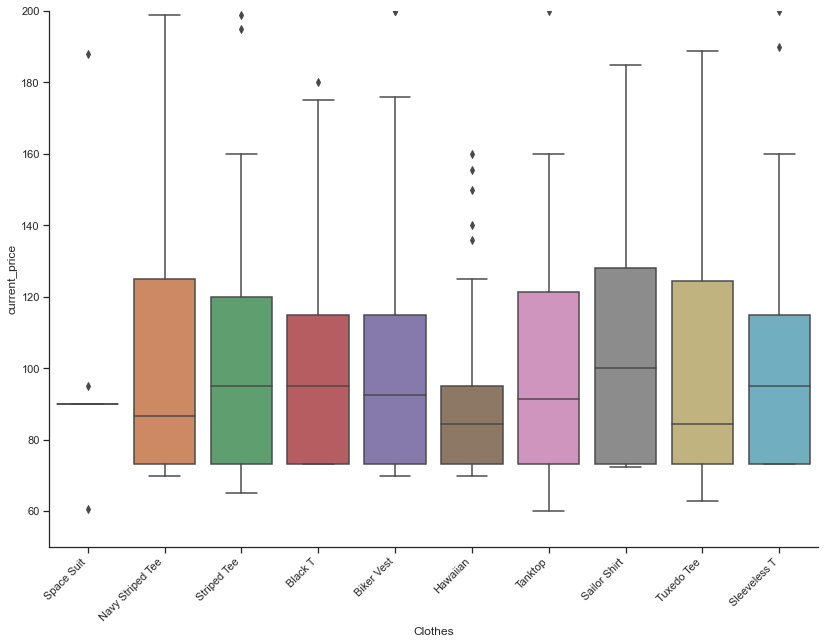

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

selection = filtered_data.Clothes.value_counts().head(10).index

sns.set_theme(style="ticks", color_codes=True)
plot=sns.catplot(x="Clothes", y="current_price", kind="box", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,200);

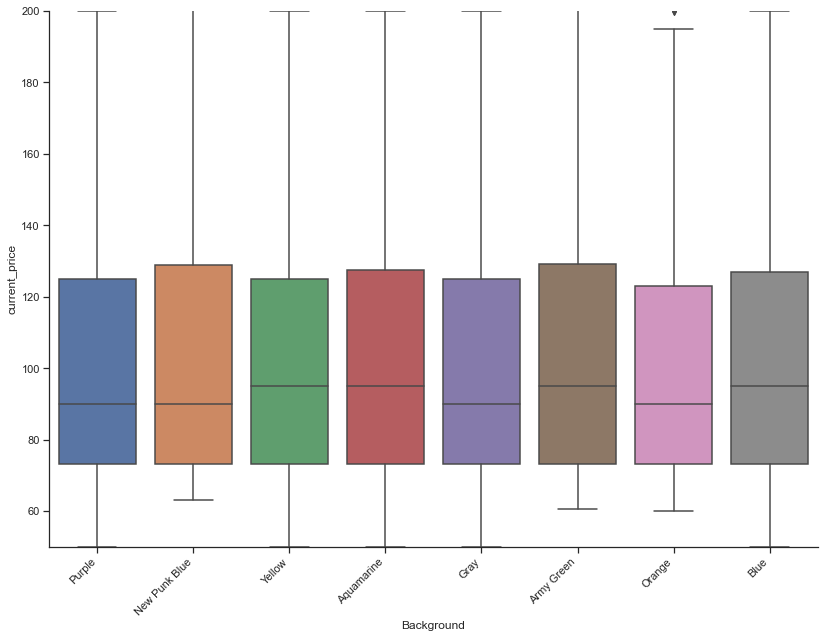

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

selection = filtered_data.Background.value_counts().head(10).index

sns.set_theme(style="ticks", color_codes=True)
plot=sns.catplot(x="Background", y="current_price", kind="box", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,200);
#Background	Fur	Clothes	Mouth	Eyes

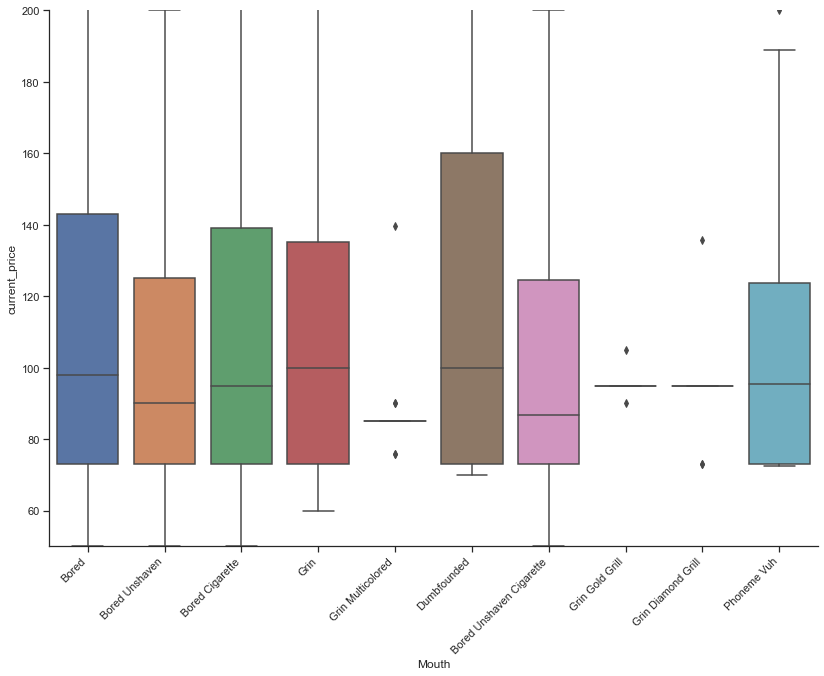

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

selection = filtered_data.Mouth.value_counts().head(10).index

sns.set_theme(style="ticks", color_codes=True)
plot=sns.catplot(x="Mouth", y="current_price", kind="box", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,200);
#Background	Fur	Clothes	Mouth	Eyes

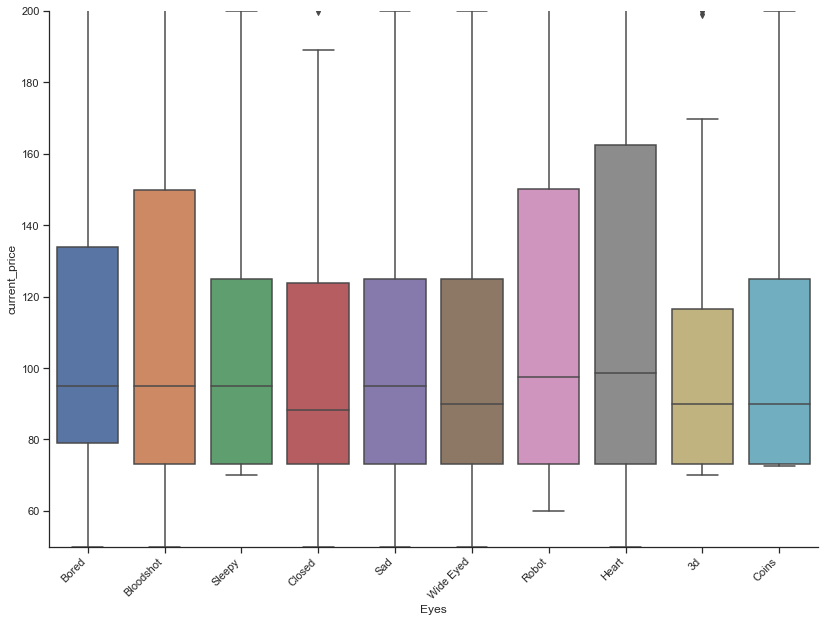

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

selection = filtered_data.Eyes.value_counts().head(10).index

sns.set_theme(style="ticks", color_codes=True)
plot=sns.catplot(x="Eyes", y="current_price", kind="box", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,200);
#Background	Fur	Clothes	Mouth	Eyes

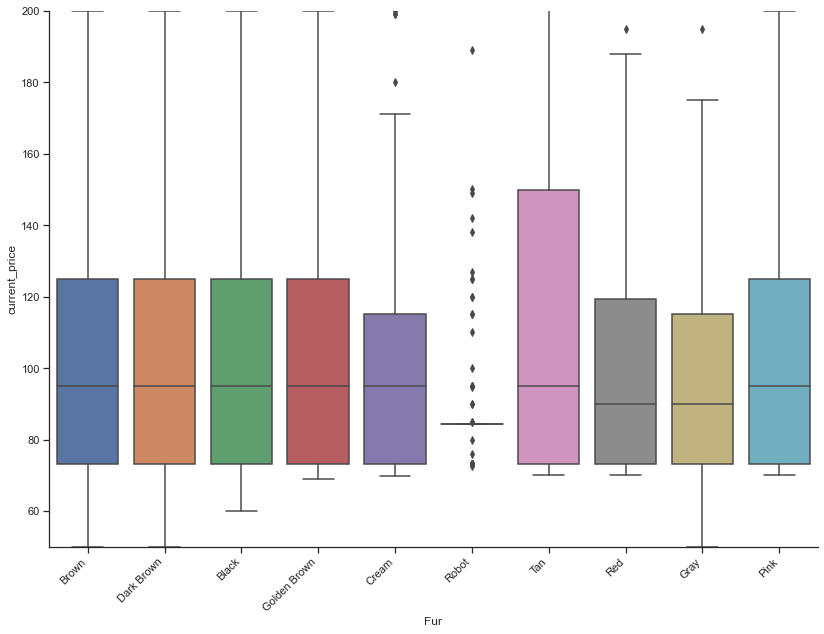

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

selection = filtered_data.Fur.value_counts().head(10).index

sns.set_theme(style="ticks", color_codes=True)
plot=sns.catplot(x="Fur", y="current_price", kind="box", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45, ha='right')
plt.ylim(50,200);
#Background	Fur	Clothes	Mouth	Eyes

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="ticks", color_codes=True)
#plot=sns.catplot(x="Clothes", y="current_price", hue="Fur", kind="violin", order=selection, data=filtered_data, height=8.27, aspect=11.7/8.27)
#plt.xticks(rotation=45, ha='right')


10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


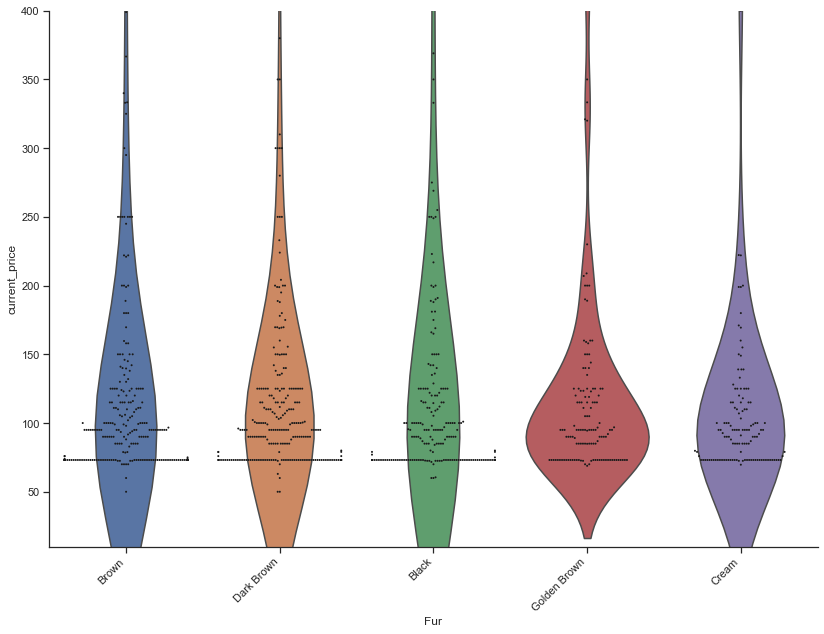

In [141]:
selection = filtered_data.Fur.value_counts().head(5).index

g = sns.catplot(x="Fur", y="current_price", order=selection, kind="violin", inner=None, data=filtered_data, height=8.27, aspect=11.7/8.27)
sns.swarmplot(x="Fur", y="current_price", order=selection, color="k", size=2, data=filtered_data, ax=g.ax)
plt.xticks(rotation=45, ha='right')
plt.ylim(10,400);
#Background	Fur	Clothes	Mouth	Eyes

14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


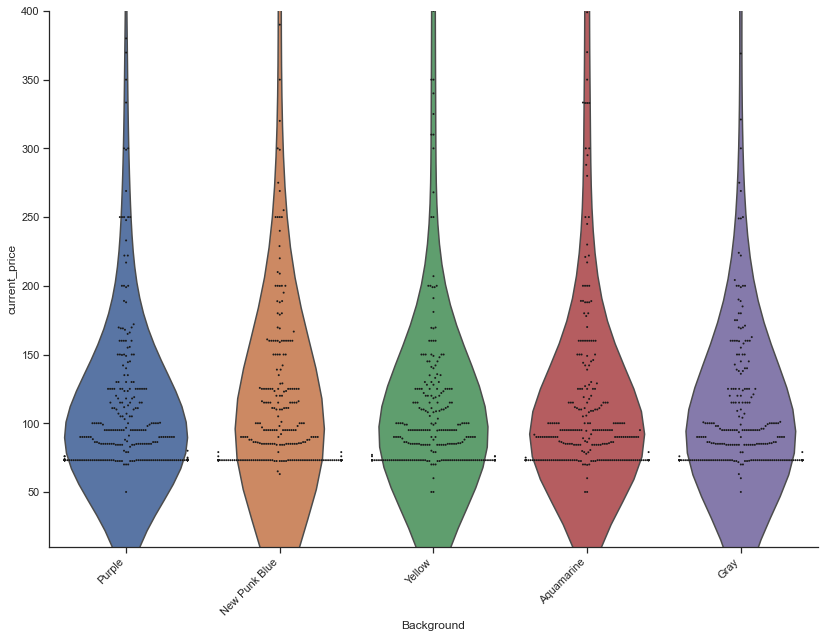

In [142]:
selection = filtered_data.Background.value_counts().head(5).index

g = sns.catplot(x="Background", y="current_price", order=selection, kind="violin", inner=None, data=filtered_data, height=8.27, aspect=11.7/8.27)
sns.swarmplot(x="Background", y="current_price", order=selection, color="k", size=2, data=filtered_data, ax=g.ax)
plt.xticks(rotation=45, ha='right')
plt.ylim(10,400);
#Background	Fur	Clothes	Mouth	Eyes

29.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


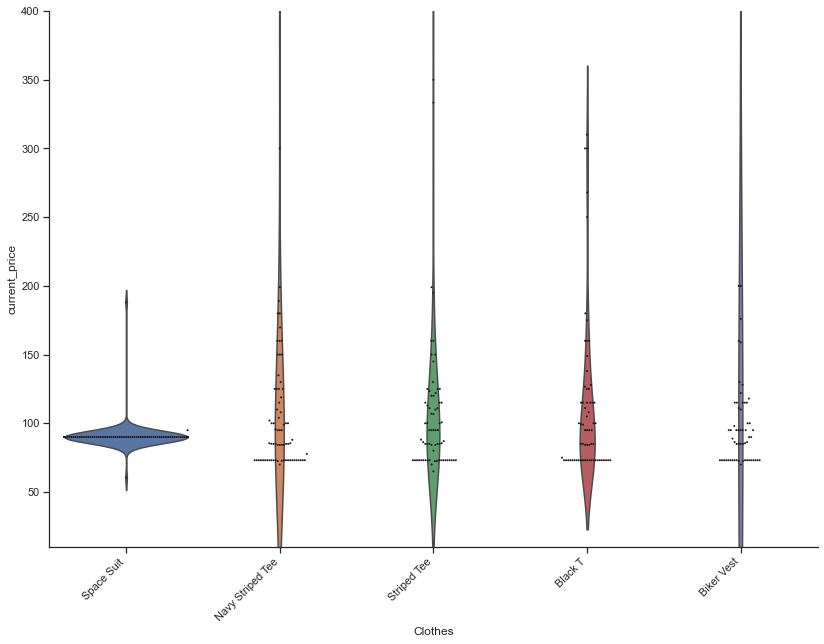

In [143]:
selection = filtered_data.Clothes.value_counts().head(5).index

g = sns.catplot(x="Clothes", y="current_price", order=selection, kind="violin", inner=None, data=filtered_data, height=8.27, aspect=11.7/8.27)
sns.swarmplot(x="Clothes", y="current_price", order=selection, color="k", size=2, data=filtered_data, ax=g.ax)
plt.xticks(rotation=45, ha='right')
plt.ylim(10,400);
#Background	Fur	Clothes	Mouth	Eyes

16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


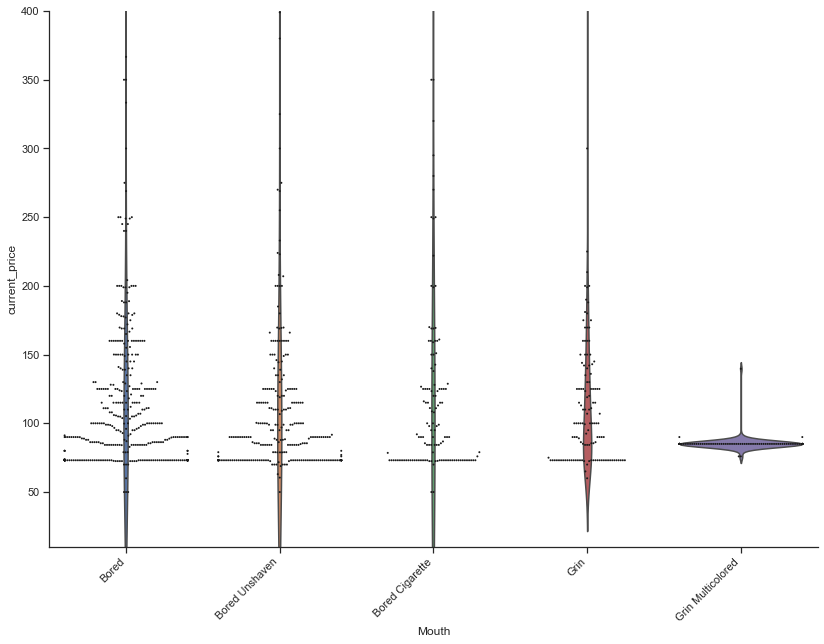

In [144]:
selection = filtered_data.Mouth.value_counts().head(5).index

g = sns.catplot(x="Mouth", y="current_price", order=selection, kind="violin", inner=None, data=filtered_data, height=8.27, aspect=11.7/8.27)
sns.swarmplot(x="Mouth", y="current_price", order=selection, color="k", size=2, data=filtered_data, ax=g.ax)
plt.xticks(rotation=45, ha='right')
plt.ylim(10,400);
#Background	Fur	Clothes	Mouth	Eyes

13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


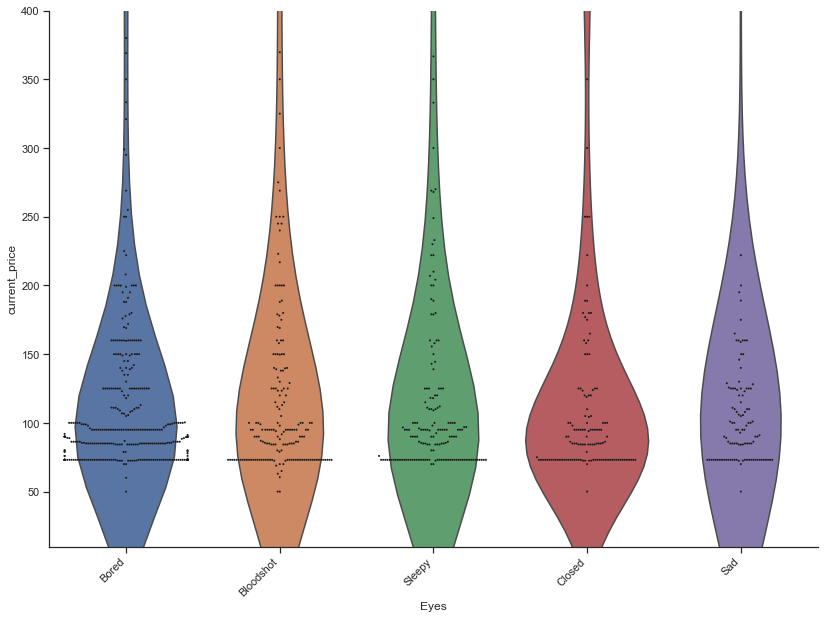

In [145]:
selection = filtered_data.Eyes.value_counts().head(5).index

g = sns.catplot(x="Eyes", y="current_price", order=selection, kind="violin", inner=None, data=filtered_data, height=8.27, aspect=11.7/8.27)
sns.swarmplot(x="Eyes", y="current_price", order=selection, color="k", size=2, data=filtered_data, ax=g.ax)
plt.xticks(rotation=45, ha='right')
plt.ylim(10,400);
#Background	Fur	Clothes	Mouth	Eyes

In [184]:
#filtered_data # Categorical
filtered_data_x # dummy_coded

,Mouth_Bored,Mouth_Bored Bubblegum,Mouth_Bored Cigar,Mouth_Bored Cigarette,Mouth_Bored Dagger,Mouth_Bored Kazoo,Mouth_Bored Party Horn,Mouth_Bored Pipe,Mouth_Bored Pizza,Mouth_Bored Unshaven,...,Hat_Trippy Captain's Hat,Hat_Vietnam Era Helmet,Hat_Ww2 Pilot Helm,Earring_Cross,Earring_Diamond Stud,Earring_Gold Hoop,Earring_Gold Stud,Earring_Silver Hoop,Earring_Silver Stud,current_price
token_id,,,,,,,,,,,,,,,,,,,,,
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,189.000
1005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,139.000
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,95.010
1012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88.110
1017,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,79.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,207.960
9992,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125.010
9993,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000.000


In [189]:
sorted_price = filtered_data.sort_values(by=['current_price'], ascending=False)
sorted_price

,Background,Fur,Clothes,Mouth,Eyes,collection_name,contract_address,current_price,expected_price,image_url,timestamp,Hat,Earring
token_id,,,,,,,,,,,,,
840,Orange,Robot,Biker Vest,Bored,Bored,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,2021.000,218880000000000000000,https://lh3.googleusercontent.com/_aWkuzzdhzy5...,2022-01-15 20:53:04.279284,Beanie,NaN
8462,New Punk Blue,Black,Lumberjack Shirt,Dumbfounded,3d,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,2000.000,218880000000000000000,https://lh3.googleusercontent.com/t3ElLPB8TLlG...,2022-01-15 19:36:43.345639,Halo,NaN
9930,Blue,Brown,Smoking Jacket,Small Grin,Zombie,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,1993.000,218880000000000000000,https://lh3.googleusercontent.com/CSVjpdwYp6P6...,2022-01-15 20:19:41.111850,Spinner Hat,NaN
5698,Blue,Tan,Work Vest,Bored Cigarette,Sleepy,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,1800.000,218880000000000000000,https://lh3.googleusercontent.com/rXo_POs4Ye0X...,2022-01-15 18:20:56.154037,Beanie,NaN
8792,Aquamarine,Dark Brown,Hip Hop,Bored Unshaven,Robot,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,1500.000,218880000000000000000,https://lh3.googleusercontent.com/6LpDpSngSx5C...,2022-01-15 19:45:32.695738,Beanie,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,Yellow,Solid Gold,Lumberjack Shirt,Bored Unshaven Cigarette,Wide Eyed,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,50.000,218880000000000000000,https://lh3.googleusercontent.com/s5MG60fqPR1I...,2022-01-15 19:41:43.154988,Prussian Helmet,NaN
8911,Aquamarine,Gray,Service,Bored Cigarette,Sad,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,50.000,218880000000000000000,https://lh3.googleusercontent.com/g75eD4eDQey7...,2022-01-15 19:49:13.498222,NaN,NaN
4614,Yellow,Solid Gold,NaN,Bored,Closed,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,50.000,218880000000000000000,https://lh3.googleusercontent.com/BSE_d1xfv8_1...,2022-01-15 17:46:38.712790,Prussian Helmet,Silver Hoop


<AxesSubplot:xlabel='token_id', ylabel='current_price'>

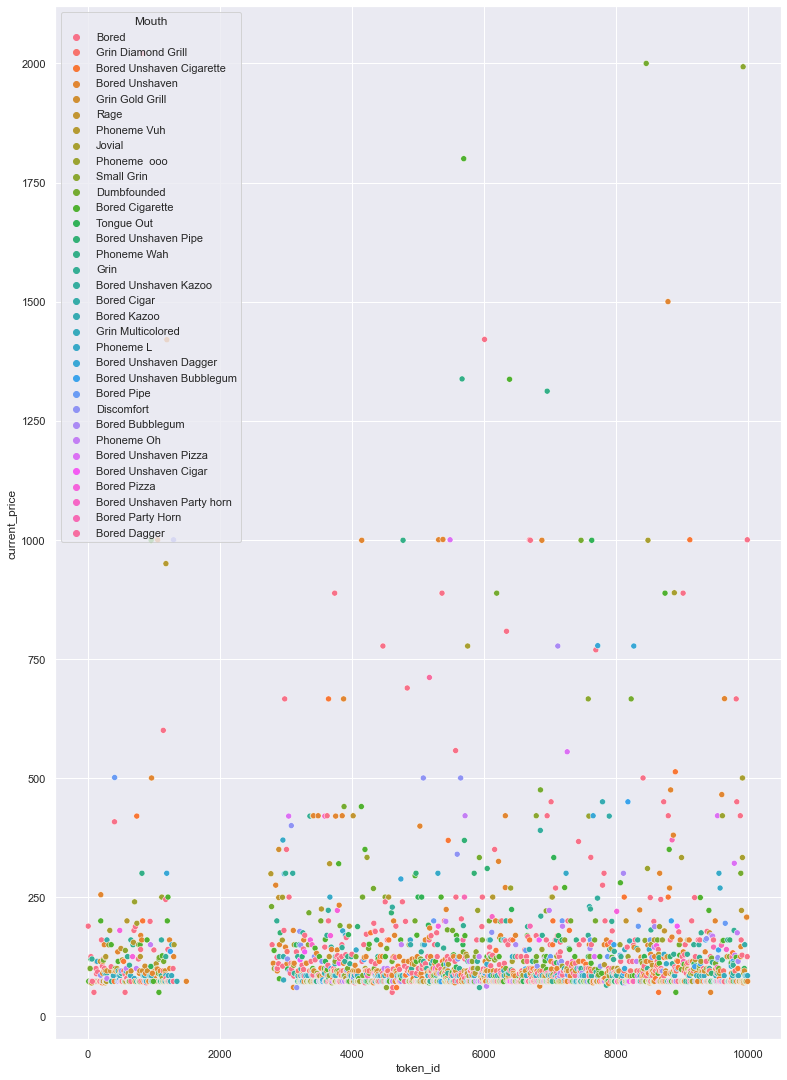

In [200]:
import seaborn as sns
sns.set(rc={"figure.figsize":(13, 19)}) #width=3, #height=4
#sns.scatterplot(data=sorted_price, x=df.index, y='current_price', hue='Mouth')
sns.scatterplot(data=filtered_data, x=filtered_data.index, y='current_price', hue='Mouth')

Text(0.5, 1.0, 'Correlation Heatmap')

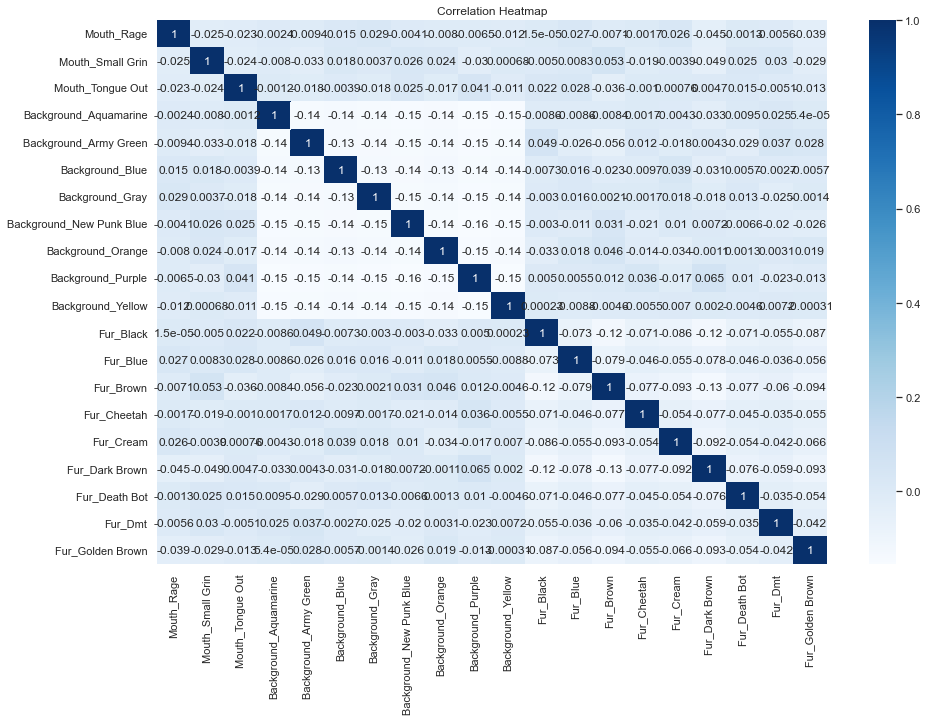

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
sns.heatmap(filtered_data_x.iloc[: , 30:50].corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Heatmap")

In [227]:
filtered_data_x['Background_Aquamarine'].corr(filtered_data_x['current_price'])

-0.0014500793019791226

In [249]:
columns_list = filtered_data_x.columns

In [250]:
len(columns_list)

169

In [243]:
#my_dict = {"Trait":[],"Corr":[]}
df = pd.DataFrame(columns=['Trait', 'Correlation'])

In [244]:
df

,Trait,Correlation


In [265]:
for column in columns_list:
    corr = filtered_data_x[column].corr((filtered_data_x['current_price']))
    print (corr, column)


0.0395047596189107 Mouth_Bored
-0.011478133790952427 Mouth_Bored Bubblegum
-0.021007924324079524 Mouth_Bored Cigar
0.02637410714899185 Mouth_Bored Cigarette
0.041268407526459154 Mouth_Bored Dagger
-0.026351139143431023 Mouth_Bored Kazoo
-0.02760596686988868 Mouth_Bored Party Horn
-0.012771947853591132 Mouth_Bored Pipe
0.01526159951864193 Mouth_Bored Pizza
0.02704429130946581 Mouth_Bored Unshaven
-0.011504417316785477 Mouth_Bored Unshaven Bubblegum
-0.037613178409647216 Mouth_Bored Unshaven Cigar
-0.0032354590983208276 Mouth_Bored Unshaven Cigarette
0.07152706333889135 Mouth_Bored Unshaven Dagger
0.006315429683675999 Mouth_Bored Unshaven Kazoo
0.010240830399236482 Mouth_Bored Unshaven Party horn
-0.009827934911346464 Mouth_Bored Unshaven Pipe
0.1108487429789346 Mouth_Bored Unshaven Pizza
0.01351961690290166 Mouth_Discomfort
0.046478750186214265 Mouth_Dumbfounded
-0.03499994291981188 Mouth_Grin
-0.046930342944072265 Mouth_Grin Diamond Grill
-0.04448466727886737 Mouth_Grin Gold Grill
-0.0

In [268]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, facecolor='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

In [271]:
filtered_data_x.shape

(2137, 169)

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


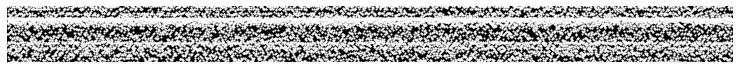

In [278]:
import numpy as np
from scipy.sparse import coo_matrix

s = np.ones_like(rows)

m = coo_matrix(filtered_data_x.T)
ax = plot_coo_matrix(m)
ax.figure.show()

In [253]:
#filtered_data_x[column].corr((filtered_data_x['current_price']))

In [257]:
#filtered_data_x.describe

In [279]:
m

<169x2137 sparse matrix of type '<class 'numpy.float64'>'
	with 15011 stored elements in COOrdinate format>